<h1>Data Cleaning for KB Heatmap</h1>

by ERMITANO, Kate Justine

<b>Supervisor:</b> Miss Fherlyn Yet

<h2>Read Dataset</h2>

In [1]:
# import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
KB_df = pd.read_csv("../KB_Products_Heatmap_Masterfile.csv")

In [3]:
KB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  4491 non-null   object 
 1   Category        4491 non-null   object 
 2   Subcategory     4490 non-null   object 
 3   Company Name    4491 non-null   object 
 4   Address         4491 non-null   object 
 5   Latitude        4491 non-null   float64
 6   Longitude       4491 non-null   float64
 7   State           4491 non-null   object 
 8   Country         4491 non-null   object 
 9   Contact No.     4077 non-null   object 
 10  Fax No.         1555 non-null   object 
 11  Website         4353 non-null   object 
 12  Email           2753 non-null   object 
 13  Annual sales    3767 non-null   object 
 14  Employees       3567 non-null   object 
dtypes: float64(2), object(13)
memory usage: 526.4+ KB


<h2>Perform Data Cleaning</h2>

In [4]:
KB_df['Country'].unique()

array(['India', 'United Arab Emirates', 'USA', 'Taiwan', 'United Kingdom',
       'Vietnam', 'China', 'Canada', 'France', 'Czech Republic', 'Kenya',
       'Nigeria', 'Malaysia', 'Singapore', 'Thailand', 'Indonesia',
       'Germany', 'Italy', 'Ireland', 'Norway', 'Romania', 'Netherlands',
       'Sweden', 'Switzerland', 'Japan', 'Philippines', 'South Korea',
       'Turkey', 'Austria', 'Portugal', 'Greece', 'Poland'], dtype=object)

In [5]:
KB_df['State'].unique()

array(['Maharashtra', 'Tamil Nadu', 'Karnataka', 'Telangana',
       'West Bengal', 'Uttar Pradesh', 'Gujarat', 'Goa', 'Haryana',
       'Odisha', 'Madhya Pradesh', 'Delhi', 'Punjab', 'Uttarakhand',
       'Andhra Pradesh', 'Rajasthan', 'Himachal Pradesh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Jharkhand',
       'North Eastern India', 'Kerala', 'Sikkim', 'Ras Al Khaimah',
       'Indiana', 'Georgia', 'Minnesota', 'Connecticut', 'North Carolina',
       'Missouri', 'New York', 'Ohio', 'Kentucky', 'Washington',
       'Nebraska', 'Illinois', 'Iowa', 'Wisconsin', 'Florida',
       'New Hampshire', 'Tennessee', 'Louisiana', 'California', 'Texas',
       'Michigan', 'Pennsylvania', 'Vermont', 'Oregon', 'South Carolina',
       'New Jersey', 'Nevada', 'Colorado', 'Oklahoma', 'Massachusetts',
       'Alabama', 'Utah', 'Maine', 'Taipei', 'New Taipei', 'Taoyuan',
       'Hsinchu', 'Taichung', 'Chiayi', 'Miaoli', 'Tainan', 'Changhua',
       'Kaohsiung', 'Yunlin', 'Nantou', 'Taoyua

In [6]:
KB_df.isnull().any()

Business Model    False
Category          False
Subcategory        True
Company Name      False
Address           False
Latitude          False
Longitude         False
State             False
Country           False
Contact No.        True
Fax No.            True
Website            True
Email              True
Annual sales       True
Employees          True
dtype: bool

<h3>Resolve Annual Sales</h3>

In [7]:
KB_df['Annual sales'].tail(20)

4471         $20,303.00
4472         $82,813.00
4473         $76,036.00
4474        $157,987.00
4475         $82,813.00
4476     $11,223,300.00
4477         $82,813.00
4478      $3,322,600.00
4479     $31,594,700.00
4480     $30,206,400.00
4481     $11,909,900.00
4482     $12,157,800.00
4483      $3,861,300.00
4484         $82,813.00
4485        $117,236.00
4486        $454,943.00
4487      $6,898,700.00
4488        $284,815.00
4489         $82,813.00
4490    $154,063,800.00
Name: Annual sales, dtype: object

In [8]:
KB_df['Annual sales'] = KB_df['Annual sales'].str.replace(r'[\$,]', '', regex=True).str.replace('-', '')

In [9]:
KB_df['Annual sales'] = pd.to_numeric(KB_df['Annual sales'], errors='coerce').astype('float64')

<h4>Fill Null Values</h4>

In [10]:
Annual_sales_median = KB_df['Annual sales'].median()

In [11]:
Annual_sales_mean = KB_df['Annual sales'].mean()

In [12]:
print(Annual_sales_median)
print(Annual_sales_mean)

8138299.0
1237421215.6921756


In [13]:
KB_df['Annual sales'] = KB_df['Annual sales'].fillna(Annual_sales_median)

<h3>Resolve Employees</h3>

In [14]:
KB_df['Employees'].tail(20)

4471      5
4472      1
4473      1
4474      6
4475      1
4476     50
4477      1
4478     34
4479    200
4480    243
4481    171
4482    101
4483    203
4484      1
4485      5
4486      1
4487     15
4488      5
4489      1
4490    357
Name: Employees, dtype: object

In [15]:
KB_df['Employees'] = KB_df['Employees'].str.replace(r'[\$,]', '', regex=True).str.replace('-', '')

In [16]:
KB_df['Employees'] = pd.to_numeric(KB_df['Employees'], errors='coerce').astype('Int64')

<h4>Fill Null Values</h4>

In [17]:
Employees_mean = round(KB_df['Employees'].mean())
int(Employees_mean)

97172

In [18]:
Employees_median = round(KB_df['Employees'].median())
int(Employees_median)

50

In [19]:
KB_df['Employees'] = KB_df['Employees'].fillna(int(Employees_median))

<h3>Detect and Resolve Outliers</h3>

In [20]:
%matplotlib inline
# import the library
import matplotlib.pyplot as plt
# set up a theme for all visuals
plt.style.use('fivethirtyeight')

In [21]:
#plt.figure(figsize=(12,6))
plt.scatter(KB_df['Employees'], KB_df['Annual sales'], color='#fc67a5')

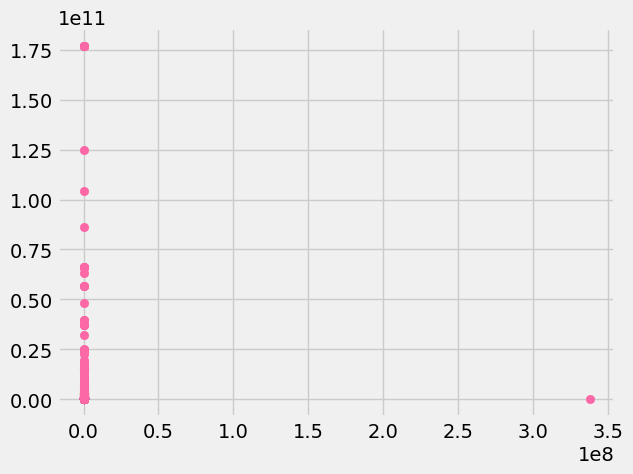

In [22]:
plt.show()

In [23]:
# Calculate IQR for 'sales'
Q1 = KB_df['Annual sales'].quantile(0.25)
Q3 = KB_df['Annual sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [24]:
KB_df['Annual sales log'] = np.log10(KB_df['Annual sales'] + 1)

In [25]:
KB_df['Employees log'] = np.log10(KB_df['Employees'] + 1)

In [26]:
#plt.figure(figsize=(12,6))
plt.scatter(KB_df['Employees log'], KB_df['Annual sales log'], color='#fc67a5')

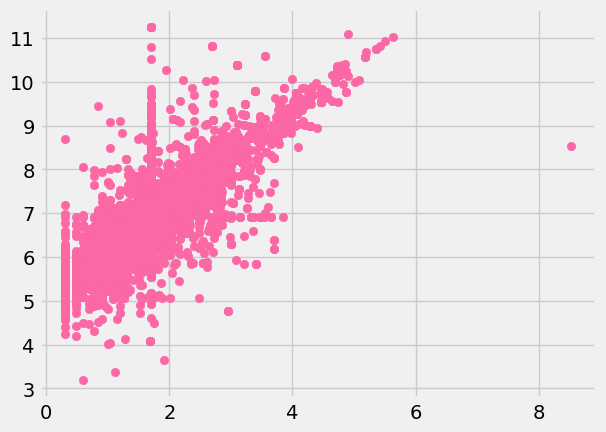

In [27]:
plt.show()

<h4>Fill Null Values</h4>

In [28]:
Annual_sales_mean = round(KB_df['Annual sales log'].mean())
KB_df['Annual sales log'] = KB_df['Annual sales log'].fillna(int(Annual_sales_mean))

In [29]:
Employees_log_mean = round(KB_df['Employees log'].mean())
KB_df['Employees log'] = KB_df['Employees log'].fillna(int(Employees_log_mean))

<h3>Resolve Categories</h3>

In [30]:
KB_df['Category'].unique()

array(['Actuators', 'Ceramics', 'Coffee Grinders',
       'Commercial / Industrial Ovens',
       'Commercial Washing/Drying Machine', 'Door Openers',
       'Duct Cleaning', 'Ice Cream/Ice Dispensing Machines',
       'Kitchen Exhaust Fans', 'Knife Grinding', 'Medical', 'Mixers',
       'Pumps', 'Medical Equipment', 'Packaging Machine'], dtype=object)

In [31]:
KB_df['Category'] = KB_df['Category'].str.replace('Medical Equipment','Medical')

In [32]:
KB_df = KB_df[~KB_df['Category'].isin(['Packaging Machine'])]

<h3>Resolve Repetitive Companies</h3>

In [33]:
KB_df['Company Name'].unique()

array(['KSB Limited - Registered Office',
       'KSB Limited - Manufacturing Plant (Pimpri)',
       'KSB Limited - Manufacturing Plant (Chinchwad)', ...,
       'MUDTEST SP Z O O', 'BMG TRADE BARTŁOMIEJ GRABOWSKI', 'TOYA S A'],
      dtype=object)

In [34]:
KB_df['Company Parent Name'] = KB_df.loc[:, 'Company Name']

In [35]:
KB_df['Company Parent Name'] = KB_df['Company Parent Name'].str.split(' - ').str[0]

In [36]:
KB_df.head(19)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual sales,Employees,Annual sales log,Employees log,Company Parent Name
0,OEM,Actuators,Actuators,KSB Limited - Registered Office,"Office No. 601, Runwal R-Square, L.B.S. Marg, ...",19.1700,72.9400,Maharashtra,India,91 20 2710 1000,NaN,ksb.com,NaN,220000000.0,341,8.342423,2.534026,KSB Limited
1,OEM,Actuators,Actuators,KSB Limited - Manufacturing Plant (Pimpri),"Pimpri, Pune, Maharashtra, India",18.6200,73.8000,Maharashtra,India,91 20 2710 1000,NaN,ksb.comen-in,NaN,220000000.0,341,8.342423,2.534026,KSB Limited
2,OEM,Actuators,Actuators,KSB Limited - Manufacturing Plant (Chinchwad),"Chinchwad, Pune, Maharashtra, India",18.6400,73.8000,Maharashtra,India,91 20 2710 1000,NaN,ksb.comen-in,NaN,220000000.0,341,8.342423,2.534026,KSB Limited
3,OEM,Actuators,Actuators,KSB Limited - Manufacturing Plant (Khandala),"Khandala, Satara District, Maharashtra, India",18.0300,73.9500,Maharashtra,India,91 20 2710 1000,NaN,ksb.comen-in,NaN,220000000.0,341,8.342423,2.534026,KSB Limited
4,OEM,Actuators,Actuators,KSB Limited - Manufacturing Plant (Vambori),"Vambori, Ahmednagar District, Maharashtra, India",19.3000,74.8000,Maharashtra,India,91 20 2710 1000,NaN,ksb.comen-in,NaN,220000000.0,341,8.342423,2.534026,KSB Limited
5,OEM,Actuators,Actuators,KSB Limited - Manufacturing Plant (Sinnar),"Sinnar, Nashik District, Maharashtra, India",19.9000,74.0000,Maharashtra,India,91 20 2710 1000,NaN,ksb.comen-in,NaN,220000000.0,341,8.342423,2.534026,KSB Limited
6,OEM,Actuators,Actuators,KSB Limited - Manufacturing Plant (Coimbatore),"Coimbatore, Tamil Nadu, India",11.0000,76.9600,Tamil Nadu,India,91 20 2710 1000,NaN,ksb.comen-in,NaN,220000000.0,341,8.342423,2.534026,KSB Limited
7,OEM,Actuators,Actuators,Rotork India - Headquarters,"28B, Ambattur Industrial Estate (North), Chenn...",13.0861,80.1645,Tamil Nadu,India,91 44 3955 5600,NaN,rotork.com,NaN,40400000.0,316,7.606381,2.501059,Rotork India
8,OEM,Actuators,Actuators,Rotork India - Manufacturing Plant (Jigani),"Jigani, Bangalore, Karnataka, India",12.7500,77.6500,Karnataka,India,NaN,NaN,rotork.com,NaN,40400000.0,316,7.606381,2.501059,Rotork India
9,OEM,Actuators,Actuators,AUMA India Private Limited - Office (Chennai),"# 10 21, Eden Villa, First Floor, Flat No. 4, ...",13.0827,80.2707,Tamil Nadu,India,91 44 4552 4447,NaN,auma.comen_IN,NaN,46749700.0,291,7.669779,2.465383,AUMA India Private Limited


In [37]:
new_KB_df = KB_df[['Company Parent Name', 'Annual sales', 'Employees', 'Country', 'State']]

In [38]:
new_KB_df

,Company Parent Name,Annual sales,Employees,Country,State
0,KSB Limited,220000000.0,341,India,Maharashtra
1,KSB Limited,220000000.0,341,India,Maharashtra
2,KSB Limited,220000000.0,341,India,Maharashtra
3,KSB Limited,220000000.0,341,India,Maharashtra
4,KSB Limited,220000000.0,341,India,Maharashtra
...,...,...,...,...,...
4486,POLMIX AST SP Z O O,454943.0,1,Poland,Gdańsk
4487,RAFSTAL SP Z O O,6898700.0,15,Poland,Piekary Śląskie
4488,MUDTEST SP Z O O,284815.0,5,Poland,Chrzanów
4489,BMG TRADE BARTŁOMIEJ GRABOWSKI,82813.0,1,Poland,Zamość


In [39]:
new_KB_df['Company Parent Name'] = new_KB_df['Company Parent Name'].str.title()

C:\Users\katee\AppData\Local\Temp\ipykernel_13804\4205214630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_KB_df['Company Parent Name'] = new_KB_df['Company Parent Name'].str.title()


In [40]:
new_KB_df = new_KB_df.drop_duplicates(subset=['Company Parent Name'], keep='first')

In [41]:
new_KB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3385 entries, 0 to 4490
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Parent Name  3385 non-null   object 
 1   Annual sales         3385 non-null   float64
 2   Employees            3385 non-null   Int64  
 3   Country              3385 non-null   object 
 4   State                3385 non-null   object 
dtypes: Int64(1), float64(1), object(3)
memory usage: 162.0+ KB


In [43]:
new_KB_df

,Company Parent Name,Annual sales,Employees,Country,State
0,Ksb Limited,220000000.0,341,India,Maharashtra
7,Rotork India,40400000.0,316,India,Tamil Nadu
9,Auma India Private Limited,46749700.0,291,India,Tamil Nadu
15,Emerson Automation Solutions Intelligentplatfo...,16036999.0,106,India,Karnataka
16,Flowserve India Controls Pvt. Ltd.,218504400.0,1706,India,Karnataka
...,...,...,...,...,...
4486,Polmix Ast Sp Z O O,454943.0,1,Poland,Gdańsk
4487,Rafstal Sp Z O O,6898700.0,15,Poland,Piekary Śląskie
4488,Mudtest Sp Z O O,284815.0,5,Poland,Chrzanów
4489,Bmg Trade Bartłomiej Grabowski,82813.0,1,Poland,Zamość


<h2>Save CSV File</h2>

In [42]:
KB_df.to_csv('Clean_Masterfile.csv', index=False)

In [44]:
new_KB_df.to_csv('Companies_Sales_Employees.csv', index=False)